<a href="https://colab.research.google.com/github/PrachitiSParulekar/Machine-learning-algorithm-from-scratch/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

Test Accuracy: 0.9


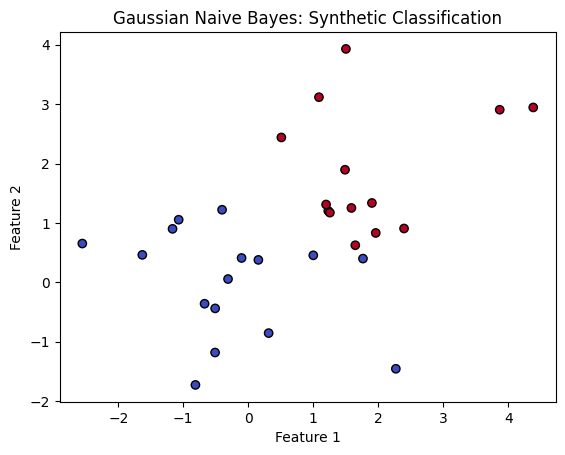

In [ ]:
#gaussian naive Bayes(for continuous features)
# Step 1: Generate synthetic data (2D features, 2 classes)
np.random.seed(0)
X_class0 = np.random.normal(loc=0, scale=1.0, size=(50, 2))  # Class 0: mean=0
X_class1 = np.random.normal(loc=2, scale=1.0, size=(50, 2))  # Class 1: mean=2
X = np.vstack([X_class0, X_class1])
y = np.array([0]*50 + [1]*50)

# Step 2: Split data (train/test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = gnb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Step 5 (optional): Visualize results
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred,  cmap="coolwarm", marker="o", edgecolor="k")
plt.title("Gaussian Naive Bayes: Synthetic Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Test Accuracy: 0.5185185185185185
Sample Actual: [1 0 1 2 0 0 1 2 0 1]
Sample Predicted: [1 0 1 0 0 0 0 2 2 1]


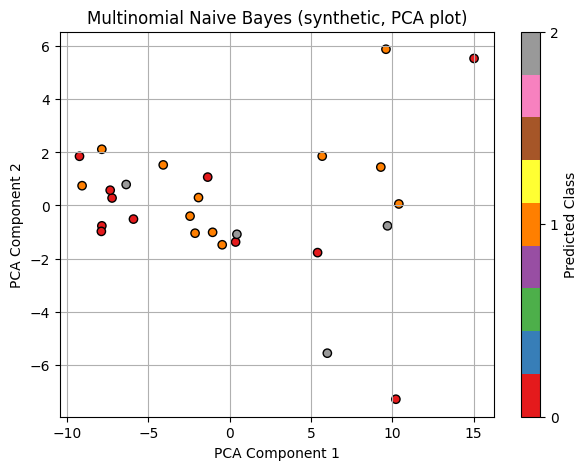

In [ ]:
#multinomial

# Step 1: Generate synthetic count data (e.g. 3 classes, 5 words)
np.random.seed(1)
n_samples = 90
n_features = 5  # pretend these are word counts
n_classes = 3

# For each class, sample from a Poisson with different lambda
X = np.vstack([
    np.random.poisson(lam=1, size=(30, n_features)),  # Class 0: rare words
    np.random.poisson(lam=4, size=(30, n_features)),  # Class 1: frequent words
    np.random.poisson(lam=8, size=(30, n_features)),  # Class 2: very frequent
])
y = np.array([0]*30 + [1]*30 + [2]*30)

# Step 2: Split data (train/test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = mnb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Step 5 (optional): Show sample predictions
print("Sample Actual:", y_test[:10])
print("Sample Predicted:", y_pred[:10])

from sklearn.decomposition import PCA
# --- Visualization: reduce to 2D with PCA, plot predictions ---
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
plt.figure(figsize=(7,5))
scatter = plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred, cmap="Set1", edgecolor="k")
plt.title("Multinomial Naive Bayes (synthetic, PCA plot)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, ticks=[0,1,2], label="Predicted Class")
plt.grid(True)
plt.show()

Test Accuracy: 0.7407407407407407


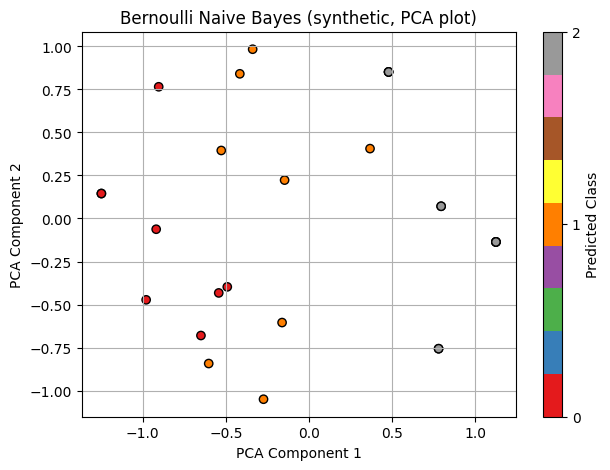

In [ ]:
#bernoulli
# Step 1: Generate synthetic binary data (3 classes, 6 binary features)
np.random.seed(3)
n_samples = 90
n_features = 6
n_classes = 3

X = np.vstack([
    np.random.binomial(n=1, p=0.2, size=(30, n_features)),  # Class 0: mostly zeros
    np.random.binomial(n=1, p=0.5, size=(30, n_features)),  # Class 1: balanced
    np.random.binomial(n=1, p=0.8, size=(30, n_features)),  # Class 2: mostly ones
])
y = np.array([0]*30 + [1]*30 + [2]*30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Fit BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Step 3: Visualization (PCA)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
plt.figure(figsize=(7,5))
scatter = plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred, cmap="Set1", edgecolor="k")
plt.title("Bernoulli Naive Bayes (synthetic, PCA plot)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, ticks=[0,1,2], label="Predicted Class")
plt.grid(True)
plt.show()
